In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

ModuleNotFoundError: No module named 'sklearn'

In [4]:
a = [-1236.50, 
-1245.50, 
-1251.00, 
-1255.50, 
-1260.30,
-1265.00, 
-1267.00, 
-1269.50,
-1274.00, 
-1280.00 
 ]
#profundidade

In [5]:
b = [2026.35,
2027.77,
2029.19,
2029.19,
2030.62,
2032.04,
2034.88,
2039.15,
2044.84,
2056.21
]
#pressão

In [6]:

fluid_pressure = {}
fluid_pressure["dry_gas_zero"] = {"name":"Dry gas zero","gradient":{"psi/ft":0.0,"psi/m":0.0,"kgf/cm2/m":0.0,"bar/m":0.0}}
#fluid_pressure["dry_gas"] = {"name":"Dry gas","gradient":{"psi/ft":0.100,"psi/m":0.328,"kgf/cm2/m":0.023,"bar/m":0.022}}
fluid_pressure["dry_gas"] = {"name":"Dry gas","gradient":{"psi/ft":0.0,"psi/m":0.0,"kgf/cm2/m":0.0,"bar/m":0.0}}
fluid_pressure["wet_gas"] = {"name":"Wet gas","gradient":{"psi/ft":0.140,"psi/m":0.459,"kgf/cm2/m":0.030,"bar/m":0.032}}
fluid_pressure["oil_limit"] = {"name":"Oil limit","gradient":{"psi/ft":0.300,"psi/m":0.984,"kgf/cm2/m":0.069,"bar/m":0.069}}
fluid_pressure["oil_60"] = {"name":"Oil 60°","gradient":{"psi/ft":0.387,"psi/m":1.270,"kgf/cm2/m":0.089,"bar/m":0.087}}
fluid_pressure["oil_20"] = {"name":"Oil 20° (heavy)","gradient":{"psi/ft":0.404,"psi/m":1.325,"kgf/cm2/m":0.093,"bar/m":0.091}}
fluid_pressure["fresh_water"] = {"name":"Fresh water","gradient":{"psi/ft":0.433,"psi/m":1.421,"kgf/cm2/m":0.100,"bar/m":0.098}}
fluid_pressure["sea_water"] = {"name":"Sea Water","gradient":{"psi/ft":0.444,"psi/m":1.457,"kgf/cm2/m":0.102,"bar/m":0.101}}
fluid_pressure["salt_sat_water"] = {"name":"Salt sat. Water","gradient":{"psi/ft":0.520,"psi/m":1.706,"kgf/cm2/m":0.120,"bar/m":0.118}}
fluid_pressure["salt_max"] = {"name":"Salt sat. Water Max","gradient":{"psi/ft":100.000,"psi/m":100.000,"kgf/cm2/m":100.000,"bar/m":100.000}}
fluid_pressure["dry_gas"]["gradient"]["psi/m"]

# REF: Ryder & Kennedy, 2011

0.0

In [7]:
def reta(ps_a,ps_b):
    val = np.polyfit(ps_a, ps_b, 1)
    #print(val[0],val[1])
    return val[0]
    
reta(np.array([a[0],a[1]]),np.array([b[0],b[1]]))

for i in range(len(a)-1):
    val = reta(np.array([a[i],a[i+1]]),np.array([b[i],b[i+1]]))
    print(val*-1)
    

0.15777777777781998
0.2581818181818162
9.442012812557104e-14
0.29791666666668765
0.3021276595744536
1.420000000000528
1.7080000000001776
1.2644444444444656
1.8950000000000498


In [8]:
coeficients = {}
array_coeficients = []
for i in range(len(a)-1):
    val = reta(np.array([a[i],a[i+1]]),np.array([b[i],b[i+1]]))
    coeficients[val*(-1.)] = [i,i+1]
    array_coeficients.append(val*(-1.))
    #print(val*(-1.))
    
print(coeficients)
array_coeficients = np.array([array_coeficients,array_coeficients])
#print(array_coeficients)
kmeans = KMeans(n_clusters=2, random_state=0).fit(array_coeficients.T)

{0.15777777777781998: [0, 1], 0.2581818181818162: [1, 2], 9.442012812557104e-14: [2, 3], 0.29791666666668765: [3, 4], 0.3021276595744536: [4, 5], 1.420000000000528: [5, 6], 1.7080000000001776: [6, 7], 1.2644444444444656: [7, 8], 1.8950000000000498: [8, 9]}


In [9]:
classified_data = [list(kmeans.labels_)[0]]+list(kmeans.labels_)
print(classified_data)

[1, 1, 1, 1, 1, 1, 0, 0, 0, 0]


In [10]:
def conversion(class_data):
    new_class_data = []
    first_value = classified_data[0]

    if first_value == 1:
        for i in range(len(classified_data)):
            if classified_data[i] == 1:
                new_class_data.append(0)
            if classified_data[i] == 0:
                new_class_data.append(1)
                
        return new_class_data
    
    return class_data

conversion(classified_data)

[0, 0, 0, 0, 0, 0, 1, 1, 1, 1]

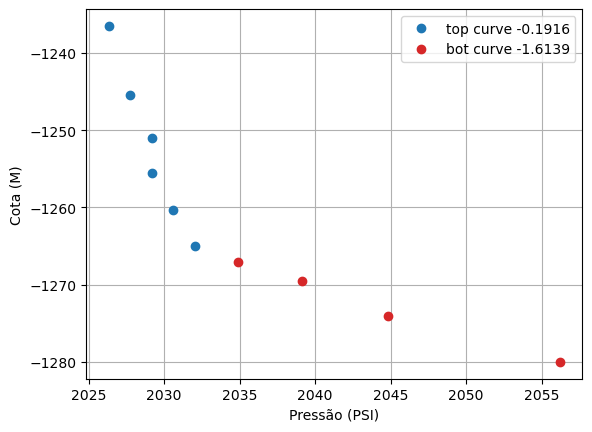

In [11]:
values_top_p = []
values_top_c = []

values_bot_p = []
values_bot_c = []

for i in range(len(classified_data)):
    if classified_data[i] == 1:
        values_top_p.append(b[i])
        values_top_c.append(a[i])
    if classified_data[i] == 0:
        values_bot_p.append(b[i])
        values_bot_c.append(a[i])
        
slope_top, intercept_top = np.polyfit(values_top_c,values_top_p, 1)
slope_bot, intercept_bot = np.polyfit(values_bot_c,values_bot_p, 1)

plt.plot(values_top_p,values_top_c,'o',c="C0",label='top curve '+str(round(slope_top,4)))
plt.plot(values_bot_p,values_bot_c,'o',c="C3",label='bot curve '+str(round(slope_bot,4)))
plt.legend()
plt.xlabel('Pressão (PSI)')
plt.ylabel('Cota (M)')
plt.grid()
plt.show()

In [12]:
### input usuário da unidade de pressão

UP = "psi/m" # unidade de pressão

ranges = {}

fluids = list(fluid_pressure.keys())

dict_pressure = {}
for i in  range(len(fluid_pressure.keys())-1):
    top = fluids[i]
    bot = fluids[i+1]
    top_value = fluid_pressure[top]["gradient"][UP]
    bot_value = fluid_pressure[bot]["gradient"][UP]
    dict_pressure[fluids[i]] = [top_value,bot_value]
    
(k := next(iter(dict_pressure)), dict_pressure.pop(k))
print(dict_pressure)

{'dry_gas': [0.0, 0.459], 'wet_gas': [0.459, 0.984], 'oil_limit': [0.984, 1.27], 'oil_60': [1.27, 1.325], 'oil_20': [1.325, 1.421], 'fresh_water': [1.421, 1.457], 'sea_water': [1.457, 1.706], 'salt_sat_water': [1.706, 100.0]}


In [13]:
fluid_top = 0

for fluid in dict_pressure:
    if -1.*round(slope_top,4) >= dict_pressure[fluid][0] and -1.*round(slope_top,4) < dict_pressure[fluid][1]:
        fluid_top = fluid
        
for fluid in dict_pressure:
    if -1.*round(slope_bot,4) >= dict_pressure[fluid][0] and -1.*round(slope_bot,4) < dict_pressure[fluid][1]:
        fluid_bot = fluid
        
fluid_top_name = fluid_pressure[fluid_top]['name']
fluid_bot_name = fluid_pressure[fluid_bot]['name']

print(fluid_top_name,"|",fluid_bot_name)


Dry gas | Sea Water


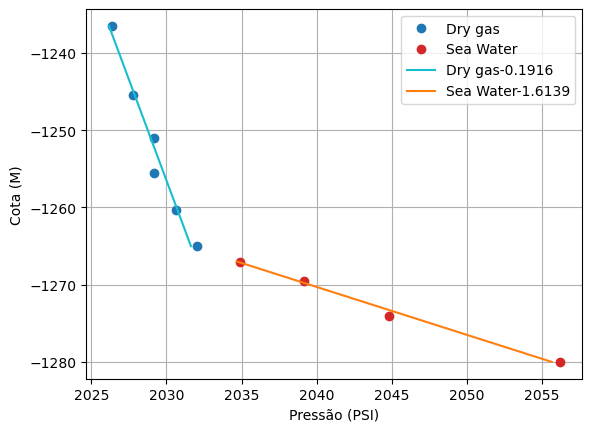

In [14]:
reta_top = slope_top*np.array(values_top_c) + intercept_top
reta_bot = slope_bot*np.array(values_bot_c) + intercept_bot


plt.plot(values_top_p,values_top_c,'o',c="C0",label=fluid_top_name)
plt.plot(values_bot_p,values_bot_c,'o',c="C3",label=fluid_bot_name)

plt.plot(reta_top,values_top_c,c="C9",label=fluid_top_name+str(round(slope_top,4)))
plt.plot(reta_bot,values_bot_c,c="C1",label=fluid_bot_name+str(round(slope_bot,4)))
plt.legend()
plt.xlabel('Pressão (PSI)')
plt.ylabel('Cota (M)')
plt.grid()
plt.show()

In [15]:
x_intercept = (intercept_bot - intercept_top) / (slope_top - slope_bot)
y_intercept = slope_top * x_intercept + intercept_top
print('O ponto de interseção das retas é',x_intercept,y_intercept)

O ponto de interseção das retas é -1265.1148220558416 2031.6491590052358


In [16]:
values_top_c

[-1236.5, -1245.5, -1251.0, -1255.5, -1260.3, -1265.0]

In [17]:
diff = np.diff(values_top_c)
print(diff)

[-9.  -5.5 -4.5 -4.8 -4.7]


In [40]:
# Extended top curve

mean_cota_top = np.mean(np.diff(values_top_c))
print(mean_cota_top)
extended_cota_top = list(values_top_c) + [mean_cota_top+np.min(values_top_c)]
print(values_top_c)
print(extended_cota_top)
extended_pressure_top = np.array(extended_cota_top)*slope_top + intercept_top
print(extended_pressure_top)

-5.7
[-1236.5, -1245.5, -1251.0, -1255.5, -1260.3, -1265.0]
[-1236.5, -1245.5, -1251.0, -1255.5, -1260.3, -1265.0, -1270.7]
[2026.16542975 2027.89018496 2028.94420203 2029.80657963 2030.72644907
 2031.62715457 2032.71949953]


In [37]:
# Extended bot curve

mean_cota_bot = np.mean(np.diff(values_bot_c))
print(mean_cota_bot)
print(np.max(values_bot_c))
extended_cota_bot =  [(np.max(values_bot_c) - mean_cota_bot)] + list(values_bot_c)
print(values_bot_c)
print(extended_cota_bot)
extended_pressure_bot = np.array(extended_cota_bot)*slope_bot + intercept_bot
print(extended_pressure_bot)

-4.333333333333333
-1267.0
[-1267.0, -1269.5, -1274.0, -1280.0]
[-1262.6666666666667, -1267.0, -1269.5, -1274.0, -1280.0]
[2027.6980273  2034.69168906 2038.72649392 2045.98914267 2055.67267434]


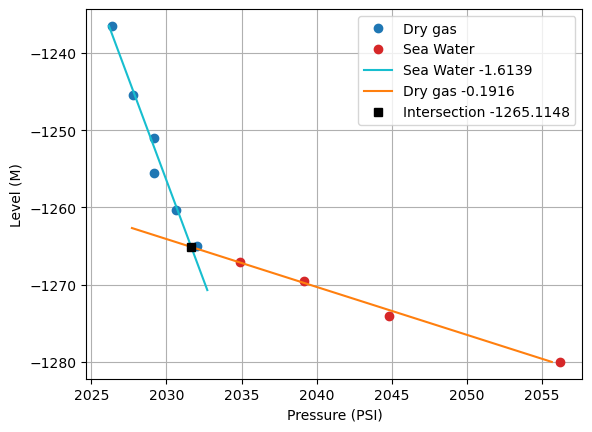

In [50]:
plt.plot(values_top_p,values_top_c,'o',c="C0",label=fluid_top_name)
plt.plot(values_bot_p,values_bot_c,'o',c="C3",label=fluid_bot_name)

plt.plot(extended_pressure_top,extended_cota_top,c="C9",label=fluid_bot_name+" "+str(round(slope_bot,4)))
plt.plot(extended_pressure_bot,extended_cota_bot,c="C1",label=fluid_top_name+" "+str(round(slope_top,4)))
plt.plot(y_intercept,x_intercept,'s',c="k",label="Intersection "+str(round(x_intercept,4)) )

plt.legend()
plt.xlabel('Pressure (PSI)')
plt.ylabel('Level (M)')
plt.grid()
plt.show()